<a href="https://colab.research.google.com/github/regularPark/openCV_prac/blob/main/Recognition_of_gestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecting body points

In [1]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/openCV/12341234.png')

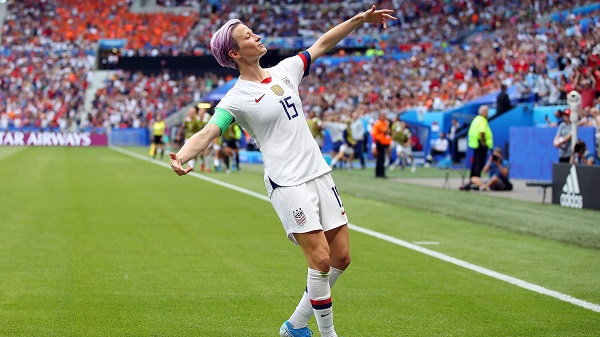

In [4]:
cv2_imshow(image)

In [6]:
image_blob = cv2.dnn.blobFromImage(image = image, scalefactor = 1.0 / 255,
                                   size = (image.shape[1], image.shape[0]))

In [8]:
type(image_blob), image_blob.shape # batch

(numpy.ndarray, (1, 3, 337, 600))

Caffe Deep Learning framework

In [10]:
network = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/Colab Notebooks/mpii/pose_deploy_linevec_faster_4_stages.prototxt',
                                   '/content/drive/MyDrive/Colab Notebooks/mpii/pose_iter_160000.caffemodel')

In [11]:
network.getLayerNames()

['conv1_1',
 'relu1_1',
 'conv1_2',
 'relu1_2',
 'pool1_stage1',
 'conv2_1',
 'relu2_1',
 'conv2_2',
 'relu2_2',
 'pool2_stage1',
 'conv3_1',
 'relu3_1',
 'conv3_2',
 'relu3_2',
 'conv3_3',
 'relu3_3',
 'conv3_4',
 'relu3_4',
 'pool3_stage1',
 'conv4_1',
 'relu4_1',
 'conv4_2',
 'relu4_2',
 'conv4_3_CPM',
 'relu4_3_CPM',
 'conv4_4_CPM',
 'relu4_4_CPM',
 'conv5_1_CPM_L1',
 'relu5_1_CPM_L1',
 'conv5_1_CPM_L2',
 'relu5_1_CPM_L2',
 'conv5_2_CPM_L1',
 'relu5_2_CPM_L1',
 'conv5_2_CPM_L2',
 'relu5_2_CPM_L2',
 'conv5_3_CPM_L1',
 'relu5_3_CPM_L1',
 'conv5_3_CPM_L2',
 'relu5_3_CPM_L2',
 'conv5_4_CPM_L1',
 'relu5_4_CPM_L1',
 'conv5_4_CPM_L2',
 'relu5_4_CPM_L2',
 'conv5_5_CPM_L1',
 'conv5_5_CPM_L2',
 'concat_stage2',
 'Mconv1_stage2_L1',
 'Mrelu1_stage2_L1',
 'Mconv1_stage2_L2',
 'Mrelu1_stage2_L2',
 'Mconv2_stage2_L1',
 'Mrelu2_stage2_L1',
 'Mconv2_stage2_L2',
 'Mrelu2_stage2_L2',
 'Mconv3_stage2_L1',
 'Mrelu3_stage2_L1',
 'Mconv3_stage2_L2',
 'Mrelu3_stage2_L2',
 'Mconv4_stage2_L1',
 'Mrelu4_sta

In [13]:
len(network.getLayerNames())

127

In [15]:
network.setInput(image_blob)
output = network.forward()

In [16]:
output.shape

(1, 44, 43, 75)

In [18]:
position_width = output.shape[3]
position_height = output.shape[2]

In [19]:
position_width

75

In [25]:
(image.shape[1] * 28) / 75

224.0

In [30]:
num_points = 15
points = []
threshold = 0.1
for i in range(num_points):
  #print(i)
  confidence_map = output[0, i, :, :]
  #print(confidence_map)
  _, confidence, _, point = cv2.minMaxLoc(confidence_map)
  # print(confidence)
  # print(point)

  x = int((image.shape[1] * point[0]) / position_width)
  y = int((image.shape[0] * point[1]) / position_height)
  # print(x,y)
  if confidence > threshold:
    cv2.circle(image, (x,y), 5,(0,255,0), thickness = -1)
    cv2.putText(image, '{}'.format(i), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255))
    points.append((x,y))
  else:
    points.append(None)

In [28]:
points

[(224, 23),
 (248, 62),
 (232, 94),
 (208, 125),
 (176, 148),
 (280, 62),
 (320, 39),
 (360, 15),
 (288, 180),
 (320, 250),
 (320, 321),
 (312, 164),
 (336, 250),
 (296, 305),
 (280, 125)]

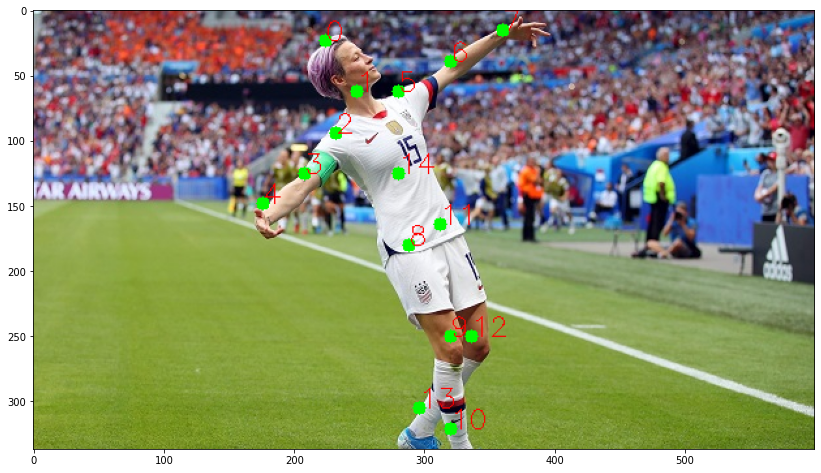

In [31]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [32]:
point_connections = [[0,1], [1,2], [2,3], [3,4], [1,5],[5,6],[6,7],[1,14], [14,8],[8,9],[9,10],[14,11],[11,12],[12,13]]

In [33]:
point_connections

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [35]:
for connection in point_connections:
  # print(connection)
  partA = connection[0]
  partB = connection[1]
  if points[partA] and points[partB]:
    cv2.line(image, points[partA],points[partB], (255,0,0))


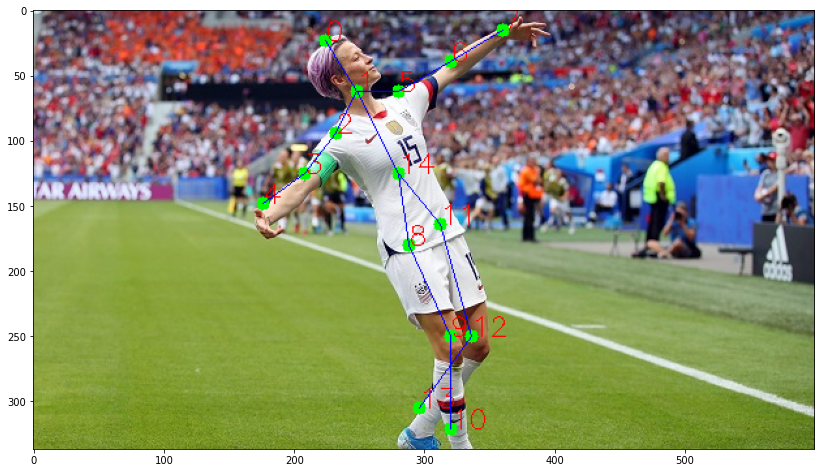

In [36]:
plt.figure(figsize=(14,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))